In [4]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# funcion seno


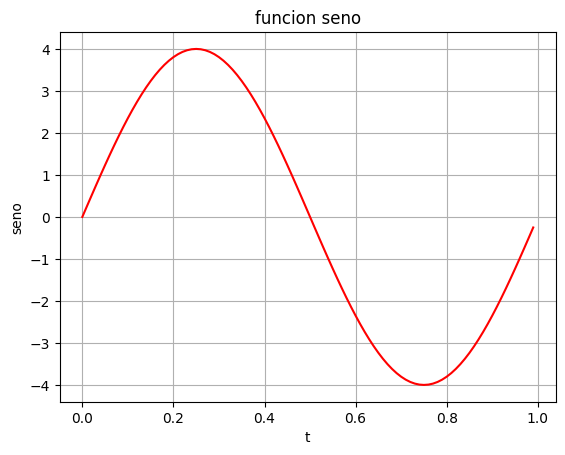

In [5]:
pi=np.pi
t= np.arange(0,1,0.01)
seno= 4*np.sin(2*pi*t)

plt.plot(t, seno,  color='red')
plt.title ('funcion seno')
plt.xlabel('t')
plt.ylabel('seno')
plt.grid(True)
plt.show()

#datos de prueba y testeo

In [6]:
X=t.reshape(-1,1)
y= seno

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


#arbol de  decision

In [7]:
arbol_de_decision = DecisionTreeRegressor(random_state=500)

# Entrenar el árbol de decisión con los datos de entrenamiento
arbol_de_decision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=500)

#evaluacion

In [8]:
y_pred = arbol_de_decision.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 0.04252840569911775


# grafica

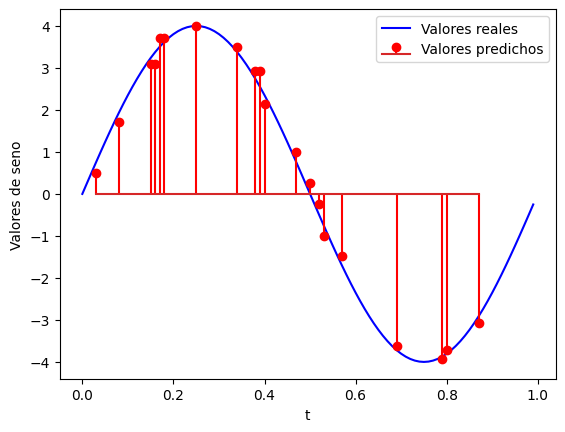

In [9]:

y_test_list = y_test.tolist()
y_pred_list = y_pred.tolist()

fig, ax = plt.subplots()
ax.plot(X, y, 'b-', label='Valores reales')
ax.stem(X_test, y_pred_list, 'r-', label='Valores predichos')
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('Valores de seno')
plt.show()


## sin sklearn


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


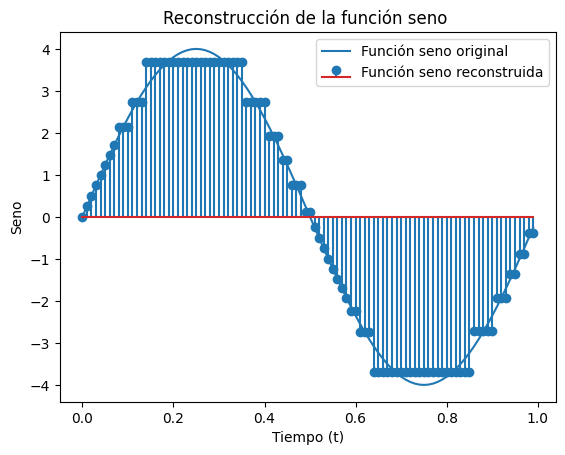

In [16]:


# Función para dividir los datos y construir el árbol
def dividir_datos(t, y, nivel=0, max_nivel=5):
    if nivel == max_nivel or len(t) < 2:
        return np.mean(y)

    mejor_error = float('inf')
    mejor_punto = None
    for punto in t:
        izq_idx = t < punto
        der_idx = t >= punto
        izq_error = np.var(y[izq_idx]) * np.sum(izq_idx)
        der_error = np.var(y[der_idx]) * np.sum(der_idx)
        error_total = izq_error + der_error
        if error_total < mejor_error:
            mejor_error = error_total
            mejor_punto = punto

    izq_idx = t < mejor_punto
    der_idx = t >= mejor_punto
    nodo_izq = dividir_datos(t[izq_idx], y[izq_idx], nivel+1, max_nivel)
    nodo_der = dividir_datos(t[der_idx], y[der_idx], nivel+1, max_nivel)

    return (mejor_punto, nodo_izq, nodo_der)

# Construir el árbol
arbol = dividir_datos(t, seno)

# Función para hacer predicciones con el árbol
def predecir(arbol, t_nuevo):
    punto, nodo_izq, nodo_der = arbol
    if not isinstance(nodo_izq, tuple):
        return nodo_izq if t_nuevo < punto else nodo_der
    else:
        if t_nuevo < punto:
            return predecir(nodo_izq, t_nuevo)
        else:
            return predecir(nodo_der, t_nuevo)

# Usar el árbol para reconstruir la función seno
seno_reconstruido = np.array([predecir(arbol, ti) for ti in t])

# Graficar la función seno original y la reconstruida
plt.plot(t, seno, label='Función seno original')
plt.stem(t, seno_reconstruido, label='Función seno reconstruida',)
plt.title('Reconstrucción de la función seno ')
plt.xlabel('Tiempo (t)')
plt.ylabel('Seno')
plt.legend()
plt.show()
